<a href="https://colab.research.google.com/github/sonuku725020-commits/CardioAI/blob/main/CNN_on_MNIST_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
# ============================================================================
# STEP 1: IMPORT LIBRARIES
# ============================================================================

# NumPy: For array operations
# WHY? Images are arrays of numbers
import numpy as np

# Matplotlib: For visualization
# WHY? We want to see images and results
import matplotlib.pyplot as plt

# TensorFlow/Keras: Deep learning framework
# WHY? Provides tools to build neural networks
from tensorflow import keras
from tensorflow.keras import layers

# Print versions for debugging
print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [18]:
# ============================================================================
# STEP 2: LOAD MNIST DATASET
# ============================================================================

# Load MNIST data from Keras datasets
# WHY Keras? It provides ready-to-use datasets
# WHAT IS MNIST? 70,000 handwritten digit images (0-9)
from tensorflow.keras.datasets import mnist

# Load and split into training and testing sets
# X = images (pixel values)
# y = labels (which digit: 0-9)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display dataset information
print("="*60)
print("DATASET LOADED")
print("="*60)
print(f"Training images: {X_train.shape}")  # (60000, 28, 28)
print(f"Training labels: {y_train.shape}")  # (60000,)
print(f"Test images: {X_test.shape}")      # (10000, 28, 28)
print(f"Test labels: {y_test.shape}")      # (10000,)
print("="*60)

DATASET LOADED
Training images: (60000, 28, 28)
Training labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)



Image shape: (28, 28)
Pixel value range: [0, 255]

Label distribution:
  Digit 0: 5923 samples
  Digit 1: 6742 samples
  Digit 2: 5958 samples
  Digit 3: 6131 samples
  Digit 4: 5842 samples
  Digit 5: 5421 samples
  Digit 6: 5918 samples
  Digit 7: 6265 samples
  Digit 8: 5851 samples
  Digit 9: 5949 samples


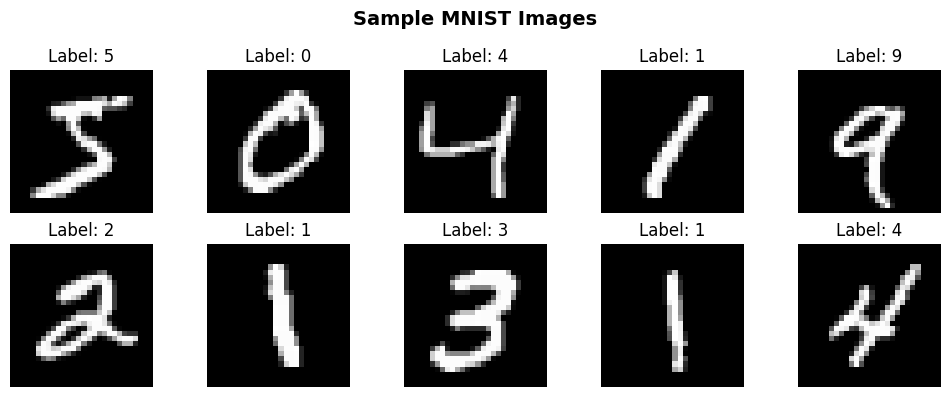

In [19]:
# ============================================================================
# STEP 3: EXPLORE THE DATA
# ============================================================================

# Check image dimensions
print(f"\nImage shape: {X_train[0].shape}")  # (28, 28)
print(f"Pixel value range: [{X_train.min()}, {X_train.max()}]")  # [0, 255]

# Check label distribution
unique, counts = np.unique(y_train, return_counts=True)
print(f"\nLabel distribution:")
for digit, count in zip(unique, counts):
    print(f"  Digit {digit}: {count} samples")

# Visualize sample images
# WHY? To understand what we're working with
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')  # Display in grayscale
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample MNIST Images", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [20]:
# ============================================================================
# STEP 4: PREPROCESS DATA
# ============================================================================

# -----------------------
# 4A: RESHAPE
# -----------------------
# WHY? CNNs need 3D images: (height, width, channels)
# Original: (60000, 28, 28)
# Target: (60000, 28, 28, 1)  ← 1 = grayscale channel

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("\n[Preprocessing]")
print(f"After reshape: {X_train.shape}")

# -----------------------
# 4B: NORMALIZE
# -----------------------
# WHY? Neural networks work better with small numbers
# Original range: [0, 255] (pixel intensities)
# Target range: [0, 1] (normalized)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print(f"After normalize: [{X_train.min()}, {X_train.max()}]")

# -----------------------
# 4C: ONE-HOT ENCODE LABELS
# -----------------------
# WHY? Convert single number to probability vector
# Example: 5 → [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
#              0  1  2  3  4  5  6  7  8  9

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)  # 10 classes (0-9)
y_test = to_categorical(y_test, 10)

print(f"After encoding: {y_train.shape}")
print(f"Example: {y_train[0]}")


[Preprocessing]
After reshape: (60000, 28, 28, 1)
After normalize: [0.0, 1.0]
After encoding: (60000, 10)
Example: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [21]:
# ============================================================================
# STEP 5: BUILD CNN MODEL
# ============================================================================

# Create sequential model (layers stacked one after another)
model = keras.Sequential([

    # ---------------------
    # LAYER 1: CONVOLUTION
    # ---------------------
    # PURPOSE: Detect basic features (edges, corners)
    # 32 filters = 32 different feature detectors
    # (3,3) = filter size (3x3 sliding window)
    # 'relu' = activation function (adds non-linearity)
    # 'same' = keep output size same as input
    layers.Conv2D(32, (3, 3), activation='relu',
                  padding='same', input_shape=(28, 28, 1)),
    # Output: (28, 28, 32)

    # ---------------------
    # LAYER 2: POOLING
    # ---------------------
    # PURPOSE: Reduce dimensions, keep important features
    # Takes maximum value from 2x2 blocks
    # WHY? Reduces computation, adds translation invariance
    layers.MaxPooling2D((2, 2)),
    # Output: (14, 14, 32)

    # ---------------------
    # LAYER 3: CONVOLUTION
    # ---------------------
    # PURPOSE: Detect complex patterns
    # 64 filters = more capacity for complexity
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    # Output: (14, 14, 64)

    # ---------------------
    # LAYER 4: POOLING
    # ---------------------
    layers.MaxPooling2D((2, 2)),
    # Output: (7, 7, 64)

    # ---------------------
    # LAYER 5: FLATTEN
    # ---------------------
    # PURPOSE: Convert 2D to 1D for dense layer
    # (7, 7, 64) → (3136,)
    layers.Flatten(),

    # ---------------------
    # LAYER 6: DENSE
    # ---------------------
    # PURPOSE: Learn combinations of features
    # 64 neurons with dropout for regularization
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # WHY? Prevent overfitting

    # ---------------------
    # LAYER 7: OUTPUT
    # ---------------------
    # PURPOSE: Classify into 10 digits
    # 10 neurons (one per class)
    # 'softmax' = converts to probabilities (sum = 1)
    layers.Dense(10, activation='softmax')
])

# Display model architecture
print("\n" + "="*60)
print("MODEL ARCHITECTURE")
print("="*60)
model.summary()


MODEL ARCHITECTURE


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# ============================================================================
# STEP 6: COMPILE MODEL
# ============================================================================

# Configure learning process
# WHY COMPILE? Sets up HOW the model will learn

model.compile(
    # OPTIMIZER: How to update weights
    # 'adam' = adaptive learning rate (works well out-of-the-box)
    optimizer='adam',

    # LOSS: What to minimize
    # 'categorical_crossentropy' = for multi-class classification
    loss='categorical_crossentropy',

    # METRICS: What to track
    # 'accuracy' = percentage of correct predictions
    metrics=['accuracy']
)

print("\n✓ Model compiled")
print("  Optimizer: Adam")
print("  Loss: Categorical Crossentropy")
print("  Metric: Accuracy")


✓ Model compiled
  Optimizer: Adam
  Loss: Categorical Crossentropy
  Metric: Accuracy


In [23]:
# ============================================================================
# STEP 7: TRAIN MODEL
# ============================================================================

print("\n" + "="*60)
print("TRAINING MODEL")
print("="*60)

# Train the model
# WHY FIT? This is where learning happens!
history = model.fit(
    X_train,              # Training images
    y_train,              # Training labels
    epochs=10,            # How many times to see entire dataset
    batch_size=128,       # Process 128 images at a time
    validation_split=0.1, # Use 10% of training data for validation
    verbose=1             # Show progress
)

print("\n✓ Training complete!")


TRAINING MODEL
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7566 - loss: 0.7492 - val_accuracy: 0.9780 - val_loss: 0.0675
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9551 - loss: 0.1512 - val_accuracy: 0.9862 - val_loss: 0.0510
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9674 - loss: 0.1102 - val_accuracy: 0.9875 - val_loss: 0.0404
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9750 - loss: 0.0826 - val_accuracy: 0.9877 - val_loss: 0.0428
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9764 - loss: 0.0738 - val_accuracy: 0.9895 - val_loss: 0.0405
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9809 - loss: 0.0640 - val_accuracy: 0.9900 - val_loss: 0.0368
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9811 - loss: 0.0590 - val_accuracy: 0.9892 - val_loss: 0.0394
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9846 - loss: 0.0521 -

In [24]:
# ============================================================================
# STEP 8: EVALUATE ON TEST SET
# ============================================================================

# Test on unseen data
# WHY? Check if model generalizes to new images
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("\n" + "="*60)
print("TEST RESULTS")
print("="*60)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")
print("="*60)


TEST RESULTS
Test Accuracy: 99.26%
Test Loss: 0.0242


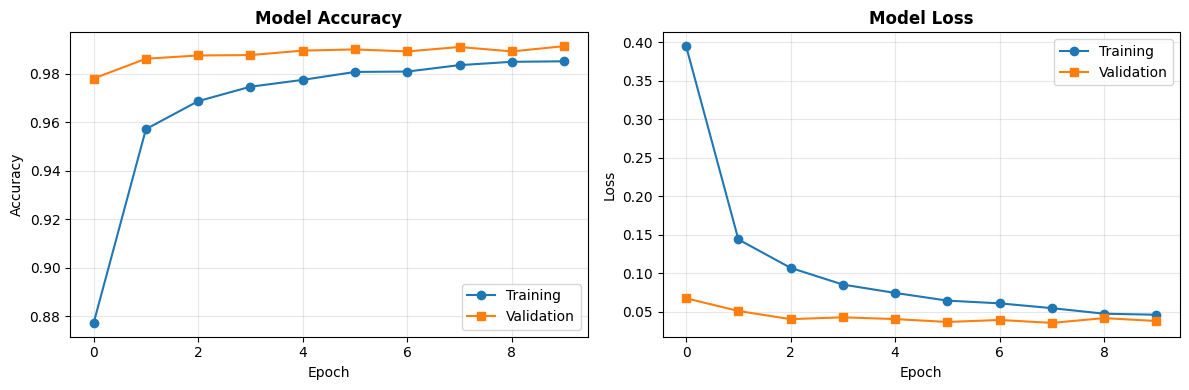

In [26]:
# ============================================================================
# STEP 9: PLOT TRAINING HISTORY
# ============================================================================

# Extract metrics from training history
plt.figure(figsize=(12, 4))

# Plot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation', marker='s')
plt.title('Model Accuracy', fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training', marker='o')
plt.plot(history.history['val_loss'], label='Validation', marker='s')
plt.title('Model Loss', fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

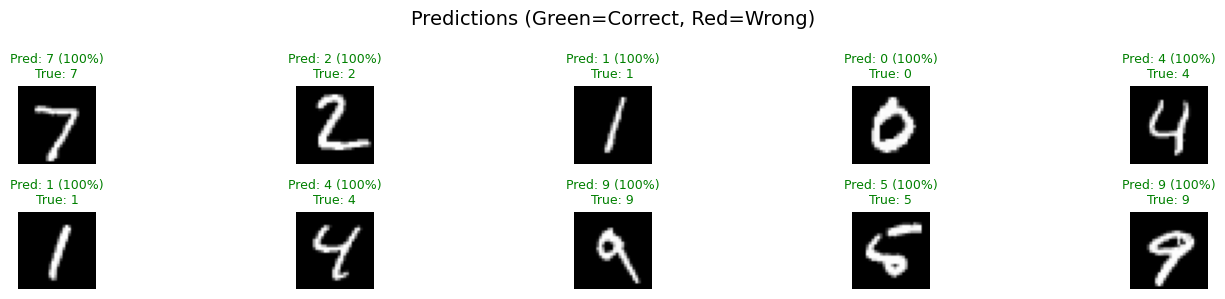

In [27]:
# ============================================================================
# STEP 10: MAKE PREDICTIONS
# ============================================================================

# Predict on test images
# WHY? See how model performs on individual images
predictions = model.predict(X_test[:10], verbose=0)

# Visualize predictions
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)

    # Display image
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')

    # Get predicted and true labels
    predicted_digit = np.argmax(predictions[i])  # Highest probability
    true_digit = np.argmax(y_test[i])
    confidence = predictions[i][predicted_digit] * 100

    # Color: green if correct, red if wrong
    color = 'green' if predicted_digit == true_digit else 'red'

    plt.title(f"Pred: {predicted_digit} ({confidence:.0f}%)\nTrue: {true_digit}",
              color=color, fontsize=9)
    plt.axis('off')

plt.suptitle('Predictions (Green=Correct, Red=Wrong)', fontsize=14)
plt.tight_layout()
plt.show()